# Lab 2 - Exploring Electric Fields and Electric Potentials
Version: January 2024

## Quick math review

An Electric Field $\vec{E}(\vec{p})$ assigns a *vector* to each point $\vec{p}$ in space.  If you pick a Cartesian coordinate system for example, then:

$$\vec{E}(x,y,z)=\left(E_x(x,y,z),\;E_y(x,y,z),\;E_z(x,y,z)\right)$$

Where (x,y,z) is a particular point in space, so that $E_x$, $E_y$, and $E_z$ are the magnitudes of the components of the field at that point and together tell you what direction the $\vec{E}$ arrow will point at that spot.  This is often abbreviated by calling (x,y,z) the position vector $\vec{r}$,  so that $\vec{E}(\vec{r})=\left(E_x(\vec{r}), E_y(\vec{r}), E_z(\vec{r})  \right)$.

Of course, if you happen to be studying a system where the $z$ direction isn't important (e.g. if the field has no z component, as in the case with an infinitely long charged cylinder), then everything of interest just takes place in the x-y plane:

$$\vec{E}(x,y)=\left(E_x(x,y),\;E_y(x,y)\right)$$

Rather simpler is the idea of a scalar field, which assigns to each point in space a single value (essentially, a scalar field is a function):

$$ V(\vec{p}) = V(x,y,z) \;\;\;\text{(cartesian coordinates)} $$

The *electric potential*, which you may not have studied yet in lecture (but which we can easily give you the tools to visualize with Python without yet knowing the detailed physics), is such a scalar field, and it turns out to have a beautiful relationship with electric fields:

$$ \vec{E}(\vec{p}) = -\nabla V(\vec{p})\;\;=-\left(\frac{\partial V}{\partial x},\;\frac{\partial V}{\partial y},\;\frac{\partial V}{\partial z}\right) = -\hat{\boldsymbol{i}}\frac{\partial V}{\partial x}-\hat{\boldsymbol{j}}\frac{\partial V}{\partial y}-\hat{\boldsymbol{k}}\frac{\partial V}{\partial z}$$

Where the $\nabla$ symbol denotes the operation of the *gradient*.

The easiest way to think about a scalar field is to think of the two dimensional situation $V(x,y)$ where the function V of (x,y) is a surface or "landscape", where each point (x,y) has some "height" associated with it.  Points where the scalar field has a greater value are "higher up" than points where it has a lower value, and since (for physics) we require that the field changes smoothly anywhere there are no charges, it may tend to look rather like hills and valleys.  

If you think of hiking in the mountains, if you hike along a path of equal elevation, you will go neither up nor down -- in essence that will be following a **contour** on the landscape, and likewise we can visualize contours of scalar fields -- lines which connect points where the field has an equal value.

The negative gradient turns out to have a nice meaning in this metaphor.  If you happen to be carrying a soccer ball with you as you hike in the mountains, then if you drop the ball it will roll down the hill along the line of *steepest descent*.  In essence, the net force it will feel is a vector that points in the steepest direction down the hill, and that turns out to be precisely what the negative gradient of a scalar field will give you!



In [79]:
# Standard packages we always use
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.markers as markers
# To create 3D visualizations we'll use Axes3D like so:
from mpl_toolkits.mplot3d import Axes3D

#For Big Plots,  run "bigplot()" before your plot command.
def bigplot():
    plt.figure(dpi=200)


---


# Code Tutorial: Creating a class to store point-charge data

We will discuss the concept of a **class** and the basics of object-oriented programming at the start of today's session.  The example code below shows how it works.

Classes are a very useful way to organize information, and are the core of the paradigm called '*object-oriented programming'* (OOP). In this paradigm, classes are the 'code objects' that a programmer creates to store and organize data for a particular task, and operate on that data.  A complex computer program usually consists of many different classes, each for a different purpose, and all working together to make the program happen. 

Today we will be defining a very basic class to help us organize information in a coherent way for the purposes of numerically calculating potentials and fields.  

### DEFINING A NEW CLASS (data type)

A **class definition** (below) is a kind of template for what you can think of as a *new datatype, one that we define for ourselves*.  Our new datatype is composed of multiple pieces of data which are all kept together under one "roof". Class definitions tell Python what to expect the new data type to contain, and give this new data type a name.

Classes can also have functions that belong to them and operate on the data they contain!  Each function needs to include "`self`" as an input variable, which tells Python that the function belongs to the class.  Each class has a *special* function that begins and ends with double underscores, called `__init__(self)`.  This special function is called *right away* when a new variable ("instance") of the datatype of your class has been created.  

Class definitions are templates for creating **instances** of the class.  As indicated above, an instance is a new variable that has a datatype of the class.  In other words, the "template" used to define the variable is the class definition, so it has that datatype.  We will demonstrate this below.

### PointCharge

To simulate electric fields and potentials, we will define a new class that stores all the necessary information that characterizes a point charge.  Then we can create as many unique charges as we like - each will be an *instance* of our PointCharge class.  We can use these charges to calculate and model electric fields.

The definition below tells Python what a "`PointCharge`" will contain. Our 'new data type', our class, contains three pieces of data.  Each new "PointCharge" will represent a different charge in space, housing a position and a charge value within itself!

In [3]:
#Define a new class (DATA TYPE) called "PointCharge" which can

class PointCharge:
    # The __init__(self) function is called AUTOMATICALLY when a new instance of the class is created.
    # Here we are telling Python that when creating a charge, we'll pass in 3 pieces of information:  initial x, y, and q values 
    # for the new charge.
    def __init__(self, initialx, initialy, initialq):
        #PointCharge has three internal values: x, y, and q.  These are given
        # initial values using our __init__ function.  See next code cell.
        self.x = initialx
        self.y = initialy
        self.q = initialq

    # nice printing:
    def __repr__(self):
        return f"Q({self.x}m, {self.y}m, {self.q}C)"
    

## Basic Example: How to make a PointCharge 'by hand'

The most basic way to create a new variable of the type you've just defined is to call the datatype with parentheses.  This *instances* the datatype, in other words, it creates a new variable which has that structure.

In the example below, variables `Q1, Q2,` and `Q3` are created using the `PointCharge` class.  When each instance is created, we feed it an initial x, y, and q value, since we included the machinery in the `__init__` function above to take three inputs and assign these to the internal values of `x, y,` and `q`.  This sets the new charges' locations and magnitudes.

In [4]:

######################################################    
# Example of how to create new PointCharges. 
Q1 = PointCharge( 0.0, 0.0, 1.0)
Q2 = PointCharge( 0.2, 0.2, 1.0)
Q3 = PointCharge( 0.3, 0.5, -2.5)
######################################################

# We now have 3 charges created, Q1, Q2, and Q3.

### You can also set these internal values at any later time.  

To set the value of an internal variable of a class instance, you use the *period*, `.`, to indicate which **member variable** of the class instance that you are referring to.  This can be used both to extract its value (e.g. `print(Q1.x)`) and to store a value in that member variable, as shown below.

In [5]:
Q1.x, Q1.y = (14.0,15.0)  #Set the position
Q1.q = -0.010   # Set the charge
  

---

# Foray 1. Model and study the Electrostatic Dipole

An electrostatic dipole consists of two equal and opposite charges placed near to each other.  If each charge has a magnitude Q and they are separated by a distance d, then the dipole moment points from the negative to the positive charge; it is defined as $\vec{p}=Q\vec{d}$  where we take the displacement vector $\vec{d}$ to point from the negative to the positive charge. (This standard is used because in nature, dipoles align themselves to point in the same direction of an external electric field.)  

 - **Define an electric dipole** by creating two PointCharges with equal and opposite unit charge in the cell below.  Set them up so that they have equal `x=0` coordinates but are located at `y = -5` and `+5` mm respectively.  With this setup, the origin should be at exactly the midpoint between them, and the x-axis should be the line of symmetry between them.  In other words, the x-axis will go through the midpoint between the charges and has a direction perpendicular to the dipole moment $\vec{p}$.




In [6]:
q1 = PointCharge(0, 0.005, 0.001)
q2 = PointCharge(0, -0.005, 0.001)

 - Now that you have your dipole created, they will cause an electric potential at every point in space as well as an electric field.  To calculate the electric potential and field due to our dipole, we must first set up a **coordinate grid** on which to perform our calculation.  Using a computer, we can only calculate at discrete points in space.  The `mgrid` command below defines those points.  It takes the following form:

`
numpy.mgrid[ xstart:xend:xstep,  ystart:yend:ystep]
`

Where the start, end and step in each direction are in physical units of distance needed for the simulation.

The result of the `mgrid` command is two 2D arrays that each simply contain coordinate values (x values, and y values, respectively) and contain these values for the entire grid of points in space over which we must calculate, from the starting value to the stopping value specified.

These arrays of coordinate values are necessary to plot a surface (2D function) or vectors or contours, as well as calculate potentials and fields.

**Avoiding division by zero**. Notice that we add a very small increment to the final array so that no points in the grid will cause division by zero if a charge happens to be exactly on a grid point.

- **Alter the mgrid command below** to span the distance from -1.0 meters to +1.0 meters in increments of 5 mm.  
- One of your goals will be to *understand* what is contained in the coordsX and coordsY arrays.  We make the claim that these arrays contain x and y spatial positions, each in the form of a 2D array. 
- Print out `coordsX`,  then print out `coordsY`.  What do you notice about these arrays?  What do they contain and how are they structured?  Does this make sense?
- **Explanation**: To simulate a field, we want to divide a region of space into a set of grid points.  So if you index the x coordinate arrays as (e.g.) `coordsX[i,j]`, then you get the spatial x position of that particular grid point.  
- Which array index (i or j) corresponds to "along the $\hat{x}$ direction" ?  What about "along the $\hat{y}$ direction"? Print out a slice of each of these, e.g. `coordsX[:10,:10]`.  Try `coordsY[:,200]` and `coordsX[:,200]` and similar commands. Try `coordsX.shape`.  Figure it out!  


In [7]:

## ***  YOU  ***  MUST CHANGE THESE COORDINATES TO MATCH WHAT *YOUR* SIMULATION REQUIRES!
##  The coordinate grid below goes from -60 to +60 METERS in 2 meter increments.
## THAT MIGHT NOT BE WHAT YOU NEED!
coordsX, coordsY = np.mgrid[-1e3:1e3 + 5:0.5, -1e3:1e3+5:0.5] / 1e3 + 0.0000001
print(coordsX)
print(coordsY)

print(coordsX[1,0]) ## hence 1st index is x
print(coordsY[1,0]) ## second index is y

[[-0.9999999 -0.9999999 -0.9999999 ... -0.9999999 -0.9999999 -0.9999999]
 [-0.9994999 -0.9994999 -0.9994999 ... -0.9994999 -0.9994999 -0.9994999]
 [-0.9989999 -0.9989999 -0.9989999 ... -0.9989999 -0.9989999 -0.9989999]
 ...
 [ 1.0035001  1.0035001  1.0035001 ...  1.0035001  1.0035001  1.0035001]
 [ 1.0040001  1.0040001  1.0040001 ...  1.0040001  1.0040001  1.0040001]
 [ 1.0045001  1.0045001  1.0045001 ...  1.0045001  1.0045001  1.0045001]]
[[-0.9999999 -0.9994999 -0.9989999 ...  1.0035001  1.0040001  1.0045001]
 [-0.9999999 -0.9994999 -0.9989999 ...  1.0035001  1.0040001  1.0045001]
 [-0.9999999 -0.9994999 -0.9989999 ...  1.0035001  1.0040001  1.0045001]
 ...
 [-0.9999999 -0.9994999 -0.9989999 ...  1.0035001  1.0040001  1.0045001]
 [-0.9999999 -0.9994999 -0.9989999 ...  1.0035001  1.0040001  1.0045001]
 [-0.9999999 -0.9994999 -0.9989999 ...  1.0035001  1.0040001  1.0045001]]
-0.9994999000000001
-0.9999999


### Now calculate the potential (scalar field) of the dipole

- The example code below will calculate the electric potential V(x,y) that results from a charge configuration of your two charges (previously defined). 

(The potential calculation below doesn't need changing, just the list.  The calculation uses superposition and *simultaneously* finds the potential at each and every coordinate grid point during a single pass of the loop due to the current point charge being used -- and progressively adds up these contributions, loop by loop, charge by charge.  This is possible due to the vectorized nature of NumPy arrays; the coordinate grids `coordsX` and `coordsY` are NumPy arrays of coordinate values.)

In [8]:
# Calculate the field from a list of charges

#The easiest way to do this is to turn the point charges into a list.
# Put YOUR charges in the list below instead of Q1 and Q2, if yours have a different name.
chargelist = [q1, q2]

#Now we can use  "For Loop"  (remember those?) to scroll through the list and add things up.

V = np.zeros_like(coordsX)  #Initially we start with a zero field with the same dimensions as our coordinate grids.

# Coulomb's constant
epsilon_0 = 8.854187e-12
k = 1/(4*np.pi*epsilon_0)


#   NOW LOOP THROUGH THE LIST AND CALCULATE POTENTIAL
# (" for each charge in the list... do this calculation")
for charge in chargelist:
    V = V + charge.q / np.sqrt((charge.x-coordsX)**2 + (charge.y-coordsY)**2)

# Rescale everything by Coulomb's constant.  We DO NOT want to put it in the calculation
# above to avoid accumulating floating-point errors!  Scaling by a small constant should
# always be done in a separate step after.
V = k*V

### Now, plot the potential along the y axis due to this dipole.

You've calculated the potential.  Now you need to see what it looks like.  One way to do this is to pick a path in space and plot the potential along that path.

Your goal here is to plot the potential along the `y` axis, which is anti-aligned with the dipole moment $\vec{p}$.  You will need to utilize array slicing to take the correct slice of the `V` potential field.  You will need to inspect/examine your `coordX` and `coordY` coordinate grids to find the right slice. This is your first challenge.

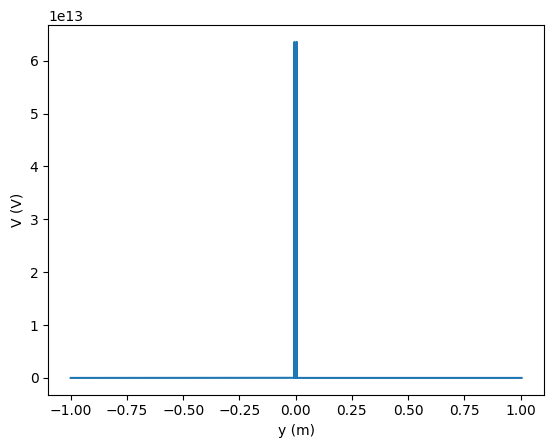

In [9]:
plt.plot(coordsY[2000,:],V[2000,:])
plt.ylabel("V (V)")
plt.xlabel("y (m)")
plt.show()

## Finding $p$ from a curve fit to potential along the y direction

The electrostatic potential due to a dipole with dipole moment $\vec{p}$ will have the following value:

$$ V(\vec{r}) = \frac{1}{4\pi\epsilon_0}\,\frac{\vec{p}\cdot\hat{r}}{r^2}$$

Show that this theory matches up with your calculation of the potential from the two point charges:

 - Taking $\vec{r} = \vec{y}$ and given that $\vec{p} = (0,p)$ for your dipole (possibly with a negative sign out front, given which direction it points), simplify the above expression and write down what the magnitude of the potential should be along the `y` axis.


### Answer here (markdown cell)
$$
\begin{align}
    \vec{r} &= \vec{y}\text{, }\vec{p}=(0,p)\implies\vec{p}\cdot\hat{r} = \frac{p\times y}{r}\\
    &\implies V(\vec{y}) = \frac{1}{4\pi\varepsilon_0}\frac{p\times y}{r^3}
\end{align}
$$
Since $\vec{r} = \vec{y} \implies r = y$,
$$
V(\vec{y}) = \frac{1}{4\pi\varepsilon_0}\frac{p}{y^2}
$$

 
 #### Regime of the fit
 
 The *dipole potential* above only "works" far enough away from the two charges that create the dipole.  It assumes that the dipole is idealized and "point-like", viz, that the equal and opposite charges are extremely close together.  Therefore, the fit you will do below must respect this assumption.  You should perform a fit only (e.g.) for positive `y` values that don't take you too near to the charges.  **So e.g. `y` $\ge$ 20 mm would probably be reasonable.**
 
 - Let's assume we **don't know** $\vec{p}$ and want to determine it.  If you fold the relevant component of $\vec{p}$ and $1/(4\pi\epsilon_0)$ into a general parameter that we'll call "A", we can do a curve fit to find the exact value of $A$ and hence, by extension, of the dipole moment.  Define this function below.  It should be intended to calculate the potential for a value of x and a potential V at any x position as input, when given the constant A.  Refer to the `scipy.optimize.curve_fit()` routine to fit your function to the calculated potential.

To refresh your memory, here is the reference documentation for the `curve_fit()` routine:

https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html

Remember that there are two sets of outputs from this.  First, the array of best-fit parameters in the order specified, 

In [10]:
from scipy.optimize import curve_fit


def fit_V( ypos, A ):
    #Our function to fit is defined here
    the_V = A / (ypos ** 2)
    
    return the_V

#Now write the fitting command
maskX = np.where(coordsX == 0.0000001)[0][0]
mask = (maskX,coordsY[maskX,:] >= 0.02)
params, covars = curve_fit(fit_V, coordsY[mask], V[mask])

### Finally plot your modeled potential and your fit curve both together:

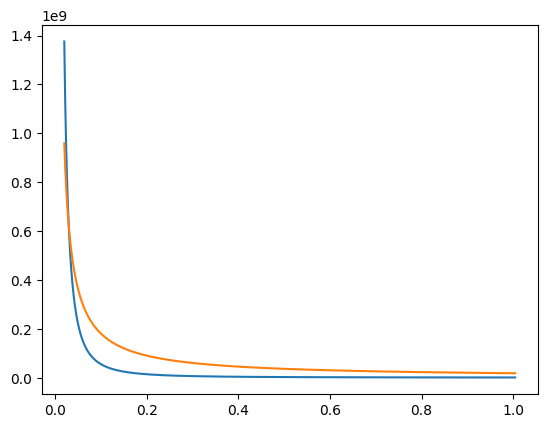

In [11]:
plt.plot(coordsY[mask], fit_V(coordsY[mask], params[0]))
plt.plot(coordsY[mask], V[mask])
plt.show()

---

# Activity 2:  Visualizing potentials and fields; automating charge creation

- In this activity you'll create an arbitrary charge distribution with many charges, and visualize the resultant field.

- You'll learn how to use a **list comprehension** to generate a python list with a single line of code.  This will let you generate a list containing an arbitrary number of charges!

## Creating PointCharges using loops and lists.

For "real" applications involving many charges (e.g. hundreds or thousands or millions), in practice we rarely would take the time to create and type in by hand a long list of charges.  That is far too much work, and we can use our coding skills to our advantage to define a list of charges automatically, and to set their member variables using a function!

**Note:  a list of PointCharges will be a standard Python list, *not* a NumPy array.**

NumPy arrays are intended and used *only* for floating point, integer, or complex data types.


### Creating a list of charges using a list comprehension


The cell below shows you how to use a *list comprehension* to define a list of charges automagically.  Then a separate function can iterate through each charge in that list, and set its position and charge according to any function you like.



In [12]:
## BASIC EXAMPLE FOR HOW TO CREATE CHARGES IN A LIST AND DEFINE VALUES WITH A FUNCTION AND LOOP

num_q = 35    #Number of charges

#List comprehension makes a list of blank PointCharges
# This combines a LOOP and a LIST together.  The square brackets indicate that
# the outcome will be a Python List.
chargelist = [ PointCharge(0.0, 0.0, 1.0) for i in range(num_q) ]   

#This makes all charges default to the ORIGIN with unit charge 1.0

### Now that you have a list of charges, use a function to set their positions and values!

Using a simple loop (e.g. `for charge in chargelist:`) you can now set each charge's value and position according to a method of your choice, e.g. you can align them to grid points or using a mathematical function or similar.  Do this in the cell below.

In [13]:
# Create a function to set your charges and their positions
def setup_charges(chargelist, w, h):
    k = len(chargelist)
    n = int(np.ceil(np.sqrt(k)))
    m = n + 1
    exes = np.linspace(0, w, n)
    whys = np.linspace(0, h, m)
    for i in range(k):
        q = chargelist[i]
        q.x = exes[i%n]
        q.y = whys[(i - i%n) // n]

## Goal: create a custom charge configuration using a list of charges

**We will then visualize the field this has set up in space.**

- Think of a charge distribution -- some shape or arrangement of charges -- that you'd like to study today.
- Create a new cell below and write code (referring to the example above) to create a set of charges to implement this charge distribution. (**You must must create more than 25 charges and they cannot be created using individual lines of code -- your code must utilize a loop and a list, a list comprehension, a function, list and loop, etc.**). 
- Set the **positions** and **charge values** of your charges to match your planned configuration.  Make sure that you choose physically realistic values.
You can get as fancy as you like.  We will be calculating the field and potential produced by your charges.
- Calculate the **potential** using the method we've already shown.

### DOCUMENT YOUR PURPOSE AND WHAT YOU ARE DOING

**You should create new cells and change their type to "markdown" and type in descriptions of what you are doing today.**



# Purpose
Investigate charge configuration in an arrangement using mandelbrot set. Recall the mandelbrot set is defined as the points

$$
\mathfrak{M} = \left\{c \in \mathbb{C} \;\;\text{s.t.}\;\; \lim_{n\rightarrow\infty}z_n = 0\right\}
$$
Where $z_n$ is recursively defined as:
$$
\begin{align}
z_{n+1} &= z_n^2 + c\\
z_0 &= 0
\end{align}
$$
We can discretise the limit in a computer, by picking some large $N$ and a small $\varepsilon > 0$:
$$
\mathfrak{M} = \left\{c \in \mathbb{C} \;\;\text{s.t.}\;\; |z_n| \le \varepsilon \;\;\forall n\in\left[0..N\right]\right\}
$$
To find the boundary of our plot, we find the first $n_c$ for some $c$ for which $|z_{n_c}| > \varepsilon$. That is: the critical $n$ for which a given $c$ finally falls out of the threshold (and for which we assume that the limit diverges). Anything inside of our mandelbrot set will have $n_c = N$ in our discrete case, and points at or near the boundary we can assume to be $s \pm \upsilon$ steps from our 'limit'. That is to say, points in the boundary are the set:
$$
\mathfrak{B} = \left\{c \in \mathbb{C} \;\;\text{s.t.}\;\; N - (s - \upsilon) \ge n_c \ge N - (s + \upsilon)\right\}
$$

All positions $\vec{r}_q$ for charges $q \in \mathfrak{C}$, where $\mathfrak{C}$ is the set of all charges are in this example $\vec{r}_q \in \mathbb{R}^2$. Since $\mathbb{R}^2 \simeq \mathbb{C}$, we can define each position as a point in the complex plane $c_q$:
$$
\vec{r}_q = \begin{bmatrix}
x\\
y
\end{bmatrix} \implies c_q = x + \mathfrak{i}y
$$
If we discretise our domain of possible positions to be a very detailed meshgrid, and find $k$ positions which satisfy the condition to be part of the $\mathfrak{B}$ set (and hence form the discrete version of this set, $\mathcal{B}$), by choosing a suitable $s$ so $k = |
\mathcal{B}| \approx \alpha |\mathcal{R}|$ where $\alpha \in \mathbb{Z}^+$, and $\mathcal{R} \simeq \mathcal{C}$ is our set of the charges positions (in cartesian and complex coordinates respectively). We can  then assign the positions $\forall c \in \mathcal{C}$ as follows:
$$
c_{i} = \sigma\left(\mathcal{B}\right)_{i\alpha}
$$
Where $\sigma$ represents some arbitrary permutation of $\mathcal{B}$ and $\sigma_{i}$ is the ith index in the permutation. Since we control the number of charges, notice that it is easier to choose an appropriate $|\mathcal{R}|$ above to minimise $k - \alpha|\mathcal{R}|$, which is what I will do.

In [119]:
# 'mandelbrot order' returns n_c for a given c passed in:
def mandelbrot_order(c, eps, N):
    z = 0
    n = 0
    while abs(z) < eps and n < N:
        z = z*z + c
        n += 1
    return n
# numpy matrix version
def grid_mandelbrot_order(grid, eps, N):
    # def gmo_helper(cc, 
    # for each point in grid:
    # run mandelbrot order
    xx, yy = grid
    cc = np.vectorize(complex)(xx, yy)
    # zz = np.zeros_like(xx)
    return (cc, np.vectorize(mandelbrot_order, excluded=["eps","N"])(cc, eps, N))

3260


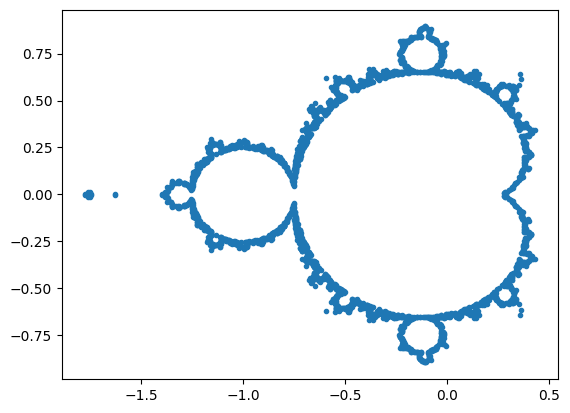

In [118]:
# returns boundary (in complex plane coords)
# I played around with the values of N, s and ups,
# until i got a nice boundary
def get_boundary(N=350, s=150, ups=70, Nx=1000, Ny=1000):
    grid = np.meshgrid(np.linspace(-2,0.5,Nx), np.linspace(-1,1,Ny))
    cc, morder = grid_mandelbrot_order(grid, 2, N)
    return cc[(N - (s-ups) >= morder) & (morder >= N - (s+ups))]
# convert to cartesian
def get_cart_boundary():
    bcc = get_boundary()
    return np.real(bcc), np.imag(bcc)

boundxs, boundys = get_cart_boundary()
k = boundxs.size
print(k)
# The beautiful boundary of mandelbrot set!
plt.scatter(*get_cart_boundary(),marker='.')
plt.show()

In [124]:
# notice 163 divides 3260 (k for default function values above) perfectly.
alpha = k // 163
mycharges = [PointCharge(boundxs[alpha * i],boundys[alpha * i],1) for i in range(163)]

## 3. Plot contours of the field

Below we use the "contour" command to plot equal-value contours of the field.

**Notice that there are user-defined custom contour values**.  This specifies exactly which potentials get plotted as contours!  **YOU need to change these values to match the contours your own potential field produces** to enable sensible contours to be depicted.

If you find that your coordinate grid is too grainy to get smooth potentials, you should make a better or finer coordinate grid.  Likewise if the potentials defined below do not work you will have to change them in order to come up with a contour plot that accurately and completely shows the shape of your Electric potential.


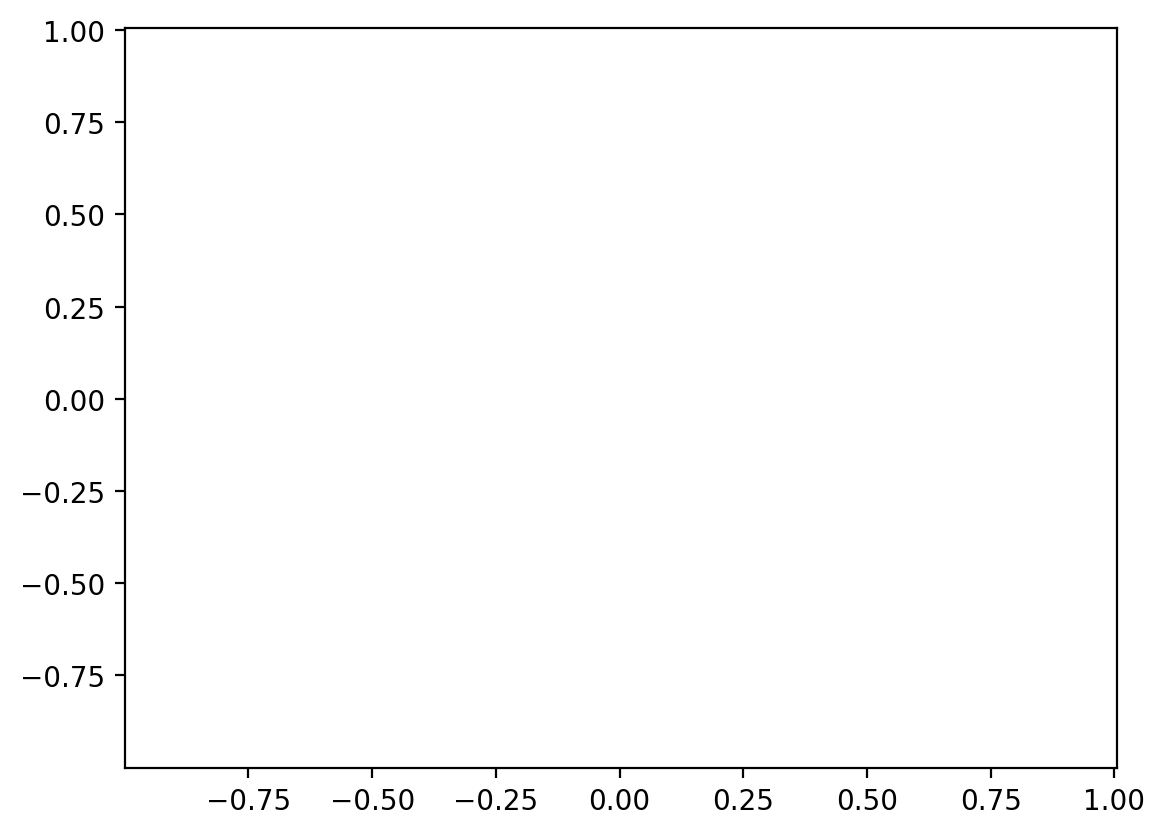

In [73]:
# the contour command creates a contour plot.  We specify 
#  that we are using our x and y coordinate system, the values V of the field,
# and we want custom-defined contour levels:

#DEFINE the potential levels you need for your charge configuration to visualize it well!
# Change these contour values to match YOUR potential field and provide sensible contours!
levels = [-10.,-1.0,-0.4,-0.25,-0.2,-0.15,-0.1,-0.05,-0.01,0.01,0.05,0.1,0.15,0.2,0.25,0.4,1.0,10.0]

bigplot()  #Make a big plot
mycontours = plt.contour(coordsX,coordsY,V, levels, colors='k')  # 'k' makes it all black. Other colors annoy.

# Contours are not much good unless you label them.  
# the following statement labels them:
plt.clabel(mycontours)

# Now show it.
plt.show()

## 4. Plot the Electric Field

Let's obtain a vector field which is the negative gradient of the scalar field we've already calculated.

In [ ]:
# It is as simple as this.
Ex, Ey = n.gradient(V)
# We take the negative separately since NumPy doesn't like to do it with the gradient statement all at once.
Ex = -Ex
Ey = -Ey


In [ ]:
Ex.max()

In [ ]:
Ey.max()

##  Mask out certain vectors so they are not plotted!

**Array masking** tells NumPy to "ignore" those particular entries in an array.  This can be quite useful to narrow your scrutiny of some data.

**Why would we ever do that??**

Near to your charges, the electric field becomes very large.  The field vectors would become far longer than any other vectors on the plot, and you would see an unreadable "tangle" of enormous vectors jumbled together.  We found the max() value of the components of the electric field so that we know how long the biggest vectors will be.  

**The statements below create two new Electric Field matrices in which elements that are outside the specified range (viz, smaller than -2 and bigger than +2) are masked out**.  This means that NumPy will ignore those entries and not plot the corresponding vectors, leaving a nice tidy field plot that is actually readable.

For your particular charge configuration you should alter the mask range to be optimal for your vector plot.

In [ ]:
Exx = n.ma.masked_outside(Ex, -0.1,0.1)
Eyy = n.ma.masked_outside(Ey, -0.1,0.1)


In [ ]:
# Now plot the (Ex, Ey) vector field!
# This is the "Quiver()" command in matplotlib.pyplot:
bigplot()
p.quiver(x,y,Exx,Eyy, angles='xy', scale = 3)
p.show()

* What direction to the vectors point?  Explain or describe the reason for this in the context of the shape of your 3D plots.

## 5.  Plot a surface plot of the electric potential


In [ ]:
# Plotting a 3D plot is a bit more involved.
 
# Color mapping
from matplotlib import cm

# First we set up a new figure, and we define
# a new 3D axes object upon which the plot will 
# be drawn.
fig = p.figure(dpi = 220)  #Make a new, big figure
ax = fig.gca(projection='3d')

#Plot the surface
surf = ax.plot_surface(x, y, V, cmap=cm.coolwarm, linewidth=0, antialiased=True)


## 5. Questions

* What is the relationship between the direction of electric field vectors and the direction and shape of the potential contours?  There is a very beautiful relationship between the contours and the electric field direction.  You may want to superimpose contour plots and quiver plots to see the two together and investigate.

In [ ]:
# We can OVERLAY PLOTS TOO!

# Make a contour plot to visualize the scalar field
p.contour(x,y,V,levels, colors="k")
# And a quiver plot shows the vector field we derived from its gradient!!
p.quiver(x,y,Exx,Eyy)

# Show
p.show()

## 6. Plot cross sections through your potential

As you found out in the first activity, your electric potential `V` is represented as a matrix of values covering a region of space that has been divided into grid points. Your `coordsX` and `coordsY` coordinate matrices are simply repeated rows or columns of the x and y positions at each coordinate point (and the computer uses these to do calculations).

Create a simple plot  (viz, `plot.plot( ...)` ) showing a cross section of the potential along one direction through your potential field.  Then do a `for` loop and create a plot of many cross sections through your field, all on the same graph.  You should see some rather excellent curves show up.  

Your instructors will be around to assist as you run into snags.